In [3]:
from fastai.vision.all import *

path = untar_data(URLs.PETS)


In [4]:
path.ls()

(#2) [Path('C:/Users/Admin/.fastai/data/oxford-iiit-pet/annotations'),Path('C:/Users/Admin/.fastai/data/oxford-iiit-pet/images')]

In [7]:
(path/'images').ls()

(#7393) [Path('C:/Users/Admin/.fastai/data/oxford-iiit-pet/images/Abyssinian_1.jpg'),Path('C:/Users/Admin/.fastai/data/oxford-iiit-pet/images/Abyssinian_10.jpg'),Path('C:/Users/Admin/.fastai/data/oxford-iiit-pet/images/Abyssinian_100.jpg'),Path('C:/Users/Admin/.fastai/data/oxford-iiit-pet/images/Abyssinian_100.mat'),Path('C:/Users/Admin/.fastai/data/oxford-iiit-pet/images/Abyssinian_101.jpg'),Path('C:/Users/Admin/.fastai/data/oxford-iiit-pet/images/Abyssinian_101.mat'),Path('C:/Users/Admin/.fastai/data/oxford-iiit-pet/images/Abyssinian_102.jpg'),Path('C:/Users/Admin/.fastai/data/oxford-iiit-pet/images/Abyssinian_102.mat'),Path('C:/Users/Admin/.fastai/data/oxford-iiit-pet/images/Abyssinian_103.jpg'),Path('C:/Users/Admin/.fastai/data/oxford-iiit-pet/images/Abyssinian_104.jpg')...]

In [8]:
fname = (path/'images').ls()[0]
re.findall(r'(.+)_\d+.jpg$', fname.name)

['Abyssinian']

In [14]:
pets = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
    item_tfms=Resize(460),
    batch_tfms=aug_transforms(size=224, min_scale=0.75)
)

pets.summary(path/'images')


Setting-up type transforms pipelines
Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      C:\Users\Admin\.fastai\data\oxford-iiit-pet\images\scottish_terrier_145.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=500x375
  Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      C:\Users\Admin\.fastai\data\oxford-iiit-pet\images\scottish_terrier_145.jpg
    applying partial gives
      scottish_terrier
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(32)

Final sample: (PILImage mode=RGB size=500x375, TensorCategory(32))


Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 

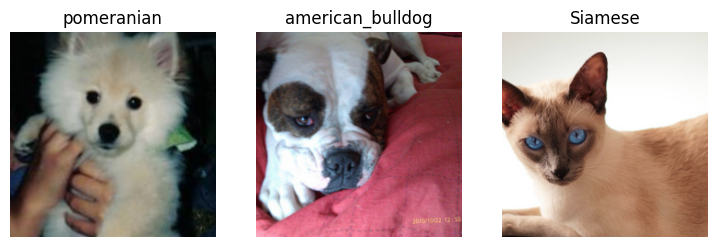

In [15]:
dls = pets.dataloaders(path/'images')
dls.show_batch(nrows=1,ncols=3)

In [16]:
learn = vision_learner(
    dls,
    resnet34,
    metrics=error_rate,
)

learn.fine_tune(2)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to C:\Users\Admin/.cache\torch\hub\checkpoints\resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:10<00:00, 8.36MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.447788,0.350261,0.110961,04:00


epoch,train_loss,valid_loss,error_rate,time
0,0.520640,0.358258,0.111637,04:49
1,0.328947,0.245443,0.070365,04:47


In [17]:
x, y = dls.one_batch()
y

TensorCategory([36, 21, 12, 14, 17, 11, 35, 15, 19, 33, 36, 25, 28,  8,  8, 21,
                32, 16, 11, 25, 10, 31, 23,  3,  6,  8, 36,  4, 16, 32, 29, 27,
                13, 13,  6,  8, 19,  2, 36, 35, 12, 25,  5,  4, 15, 32, 32, 22,
                14,  9, 22,  0, 24, 13, 24, 16, 32,  1, 16, 20, 20,  3, 26,  3])

In [19]:
preds, _ = learn.get_preds(dl=[(x, y)])
preds[0]

tensor([1.1120e-06, 4.9411e-07, 1.1791e-06, 5.6483e-08, 3.8269e-08, 5.6103e-08,
        1.5018e-07, 2.2309e-07, 8.7467e-07, 4.4759e-07, 1.3862e-07, 2.9768e-07,
        5.7602e-07, 7.5593e-07, 3.5186e-08, 7.8277e-07, 1.6510e-08, 7.7821e-06,
        9.9179e-06, 1.5105e-07, 7.8800e-08, 2.3556e-07, 1.8198e-05, 3.1595e-07,
        5.2043e-08, 4.0743e-08, 4.6151e-06, 6.5651e-08, 8.2906e-06, 8.5939e-08,
        1.6850e-08, 4.6344e-07, 1.4275e-04, 9.7207e-07, 2.1029e-06, 4.9517e-06,
        9.9979e-01])

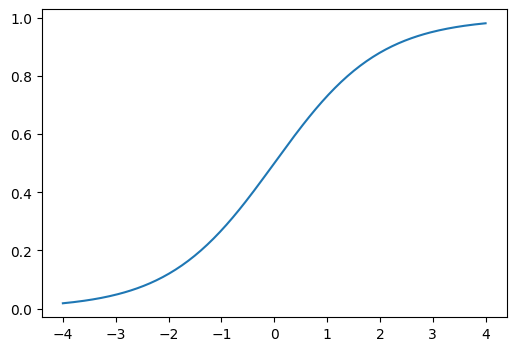

In [34]:
def plot_function(f, tx=None, ty=None, title=None, min=-2, max=2, figsize=(6,4)):
    x = torch.linspace(min,max, 200)
    fig,ax = plt.subplots(figsize=figsize)
    ax.plot(x,f(x))
    if tx is not None: ax.set_xlabel(tx)
    if ty is not None: ax.set_ylabel(ty)
    if title is not None: ax.set_title(title)

plot_function(torch.sigmoid, min=-4, max=4)

In [49]:
acts = torch.randn((6,2))*2
acts

tensor([[ 3.1004,  2.9174],
        [ 1.4335,  2.4539],
        [ 1.0588, -2.9635],
        [ 2.4183, -1.3632],
        [ 1.3563,  2.9371],
        [-0.5945, -4.8355]])

In [50]:
acts.sigmoid()

tensor([[0.9569, 0.9487],
        [0.8075, 0.9208],
        [0.7425, 0.0491],
        [0.9182, 0.2037],
        [0.7951, 0.9496],
        [0.3556, 0.0079]])

In [51]:
def softmax(x):
    return exp(x)/exp(x).sum(dim=1, keepdim=True)

In [52]:
sm_acts = torch.softmax(acts, dim=1)
sm_acts

tensor([[0.5456, 0.4544],
        [0.2650, 0.7350],
        [0.9824, 0.0176],
        [0.9777, 0.0223],
        [0.1707, 0.8293],
        [0.9858, 0.0142]])

In [53]:
targ = tensor([0,1,0,1,1,0])
idx = range(6)
sm_acts[idx, targ]

tensor([0.5456, 0.7350, 0.9824, 0.0223, 0.8293, 0.9858])

In [54]:
print(-sm_acts[idx, targ])
# nll for negative log likelihood
#  nll_loss is designed to be used after log_softmax.
F.nll_loss(sm_acts, targ, reduction='none')

tensor([-0.5456, -0.7350, -0.9824, -0.0223, -0.8293, -0.9858])


tensor([-0.5456, -0.7350, -0.9824, -0.0223, -0.8293, -0.9858])

In [55]:
loss_func = nn.CrossEntropyLoss()

In [59]:
loss_func(acts, targ) 

TypeError: CrossEntropyLoss.forward() got an unexpected keyword argument 'reduction'

In [58]:
# 一般nn和F都有
F.cross_entropy(acts, targ)

tensor(0.8228)

In [60]:
# 我们通常用nn而非F
# pytorch的loss function默认取mean，所以加个reduction='none'
nn.CrossEntropyLoss(reduction='none')(acts, targ)

tensor([0.6058, 0.3078, 0.0178, 3.8040, 0.1871, 0.0143])

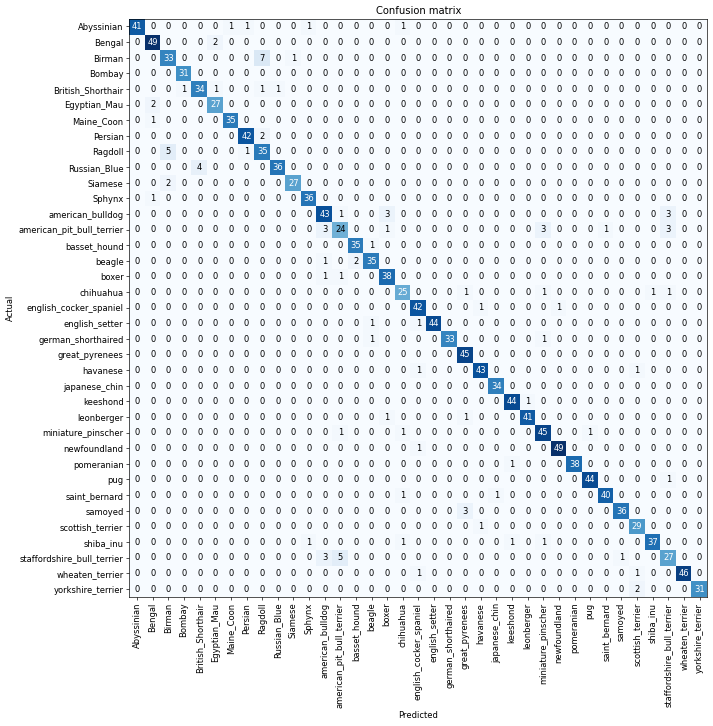

In [63]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [64]:
interp.most_confused(min_val=5)

[('Birman', 'Ragdoll', 7),
 ('Ragdoll', 'Birman', 5),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 5)]

In [65]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1, base_lr=0.1)

C:\Users\Admin\anaconda3\envs\hust\Lib\site-packages\fastai\vision\learner.py:303: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\Admin/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:04<00:00, 9.38MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,2.670096,5.638386,0.501353,02:28


epoch,train_loss,valid_loss,error_rate,time



KeyboardInterrupt



In [ ]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
lr_min, lr_steep = learn.lr_find()


In [ ]:
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep: .2e}")

In [ ]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2, base_lr=3e-3)

In [68]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fit_one_cycle(3,3e-3)
learn.unfreeze()
learn.fit_one_cycle(12, lr_max=slice(1e-6, 1e-4))


In [ ]:
learn.recorder.plot_loss()